In [1]:
import tensorflow as tf 
from tensorflow.keras import layers

In [2]:
#过拟合问题实战
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.family'] = ['STKaiTi']
matplotlib.rcParams['axes.unicode_minus']=False 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import regularizers

N_SAMPLES=2000
TEST_SIZE=0.3
X,y=make_moons(n_samples=N_SAMPLES,noise=0.2,random_state=100)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=TEST_SIZE,random_state=42)
print(X.shape,y.shape)

(2000, 2) (2000,)


<Figure size 1152x864 with 0 Axes>

findfont: Font family ['STKaiTi'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['STKaiTi'] not found. Falling back to DejaVu San

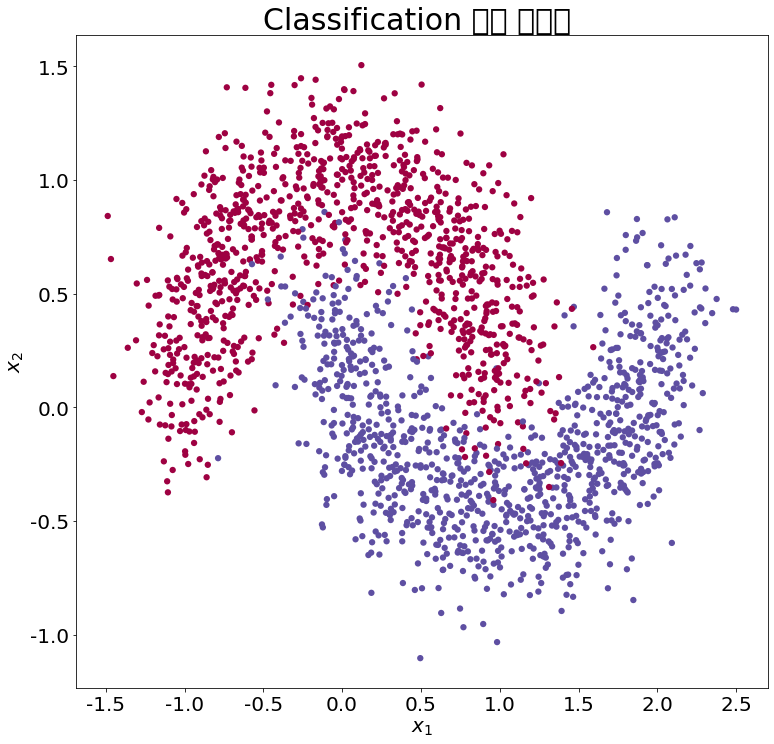

In [3]:
def make_plot(X,y,plot_name,file_name=None,XX=None,YY=None,preds=None,dark=False):
#     if(dark):
#         plt.style.use('dark_background')
#     else:
#         sns.set_style("whitegrid")
    plt.figure(figsize=(16,12))
#     plt.rcParams['figure.dpi'] = 120 #分辨率
    axes=plt.gca()
#     axes.set(xlabel="$x_1$",ylabel="$x_2$")
    plt.xlabel(xlabel="$x_1$",fontsize=20)
    plt.ylabel(ylabel="$x_2$",fontsize=20)
    plt.tick_params(labelsize=20)
    plt.title(plot_name,fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 0.8,
        cmap=plt.cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5],
        cmap="Greys", vmin=0, vmax=.6)
    # 绘制散点图，根据标签区分颜色
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral,
    edgecolors='none')
#     plt.savefig('dataset.svg')
    plt.show()
    
# 调用make_plot 函数绘制数据的分布，其中X 为2D 坐标，y 为标签
plt.figure(figsize=(16,12))
make_plot(X, y, "Classification 数据 可视化 ")

In [4]:
N_EPOCHS=25
xx = np.arange(-2, 3, 0.1)
yy = np.arange(-1.5, 2, 0.1)
print('x,y range:', xx.shape, yy.shape)
# 生成x-y平面采样网格点，方便可视化
XX, YY = np.meshgrid(xx, yy)
for n in range(5): # 构建5 种不同层数的网络
    model = Sequential()# 创建容器
    # 创建第一层
    model.add(Dense(8, input_dim=2,activation='relu'))
    for _ in range(n): # 添加n 层，共n+2 层
        model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) # 创建最末层
    model.compile(loss='binary_crossentropy', optimizer='adam',
        metrics=['accuracy']) # 模型装配与训练
    history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0)
    # 绘制不同层数的网络决策边界曲线
    preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()])
    title = "网络层数({})".format(n)
    file = "网络容量%f.png"%(2+n*1)
    make_plot(X_train, y_train, title, file, XX, YY, preds)

x,y range: (50,) (35,)


AttributeError: ignored

In [5]:
N_EPOCHS=50
xx = np.arange(-2, 3, 0.01)
yy = np.arange(-1.5, 2, 0.01)
print('x,y range:', xx.shape, yy.shape)
# 生成x-y平面采样网格点，方便可视化
XX, YY = np.meshgrid(xx, yy)
for n in range(5): # 构建5 种不同层数的网络
    model = Sequential()# 创建容器
    # 创建第一层
    model.add(Dense(8, input_dim=2,activation='relu'))
    counter=0
    for _ in range(5): # 添加n 层，共n+2 层
        model.add(Dense(64, activation='relu'))
        if counter<n:
            counter+=1
            model.add(Dropout(rate=0.5))
    model.add(Dense(1, activation='sigmoid')) # 创建最末层
    model.compile(loss='binary_crossentropy', optimizer='adam',
    metrics=['accuracy']) # 模型装配与训练
    history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0)
    # 绘制不同层数的网络决策边界曲线
    preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()])
    title = "Dropout({})".format(n)
    file = "网络容量%f.png"%(2+n*1)
    make_plot(X_train, y_train, title, file, XX, YY, preds)

x,y range: (500,) (350,)


AttributeError: ignored

x,y range: (50,) (35,)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21017 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_

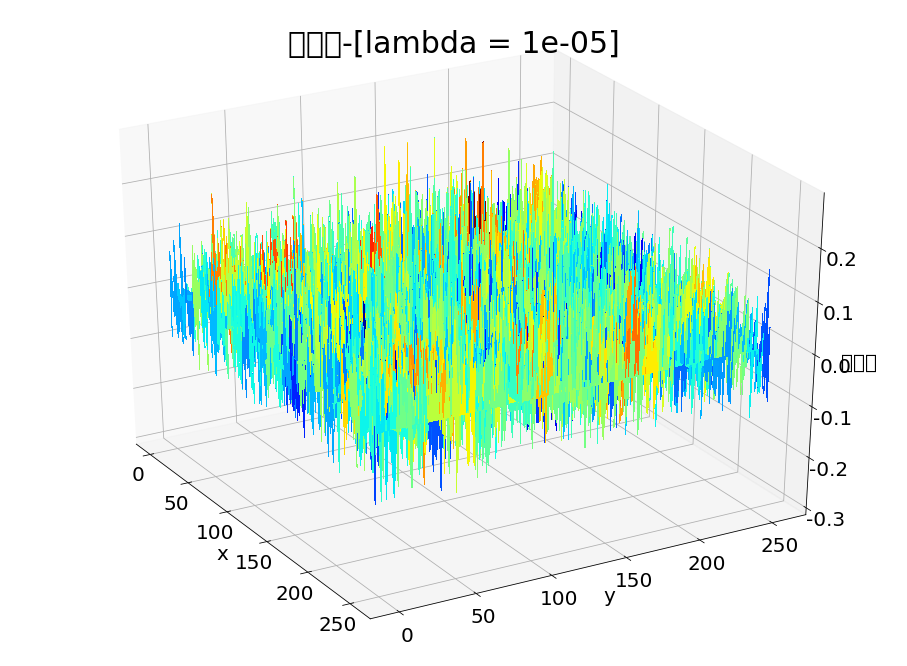

AttributeError: ignored

In [8]:
def build_model_with_regularization(_lambda):
    # 创建带正则化项的神经网络
    model = Sequential()
    model.add(Dense(8, input_dim=2,activation='relu')) # 不带正则化项
    model.add(Dense(256, activation='relu', # 带L2 正则化项
    kernel_regularizer=regularizers.l2(_lambda)))
    model.add(Dense(256, activation='relu', # 带L2 正则化项
    kernel_regularizer=regularizers.l2(_lambda)))
    model.add(Dense(256, activation='relu', # 带L2 正则化项
    kernel_regularizer=regularizers.l2(_lambda)))
    # 输出层
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',
        metrics=['accuracy']) # 模型装配
    return model

def plot_weights_matrix(model, layer_index, plot_title, file_name):
    w=model.layers[layer_index].kernel.numpy()
    X3=np.array(range(256),dtype=np.int32)
    Y3=np.array(range(256),dtype=np.int32)
    XX3, YY3 = np.meshgrid(X3, Y3)
    # 绘制himmelblau函数曲面
    fig = plt.figure(figsize=(16,12))
    ax = fig.gca(projection='3d')
    plt.xlabel(xlabel="$w_1$",fontsize=20)
    plt.ylabel(ylabel="$w_2$",fontsize=20)
    ax.set_zlabel('值范围',fontsize=20)
    plt.tick_params(labelsize=20)
    plt.title(plot_title,fontsize=30)
    # 如上代码所示，ax.plot_surface函数的参数中有ccount与rcount两个参数
    # 和cstride与rstride参数。
    # 这两个参数不能同时出现，一个便是最大的样点数，一个表示采样的步骤幅度。
    ax.plot_surface(XX3, YY3, w,rstride=10, cstride=10, cmap=plt.cm.jet,
            linewidth=0, antialiased=False)
    ax.view_init(30, -30)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()

N_EPOCHS=25
xx = np.arange(-2, 3, 0.1)
yy = np.arange(-1.5, 2, 0.1)
print('x,y range:', xx.shape, yy.shape)
# 生成x-y平面采样网格点，方便可视化
XX, YY = np.meshgrid(xx, yy)
for _lambda in [1e-5,1e-3,1e-1,0.12,0.13]: # 构建5 种不同层数的网络
    # 创建带正则化项的模型
    model = build_model_with_regularization(_lambda)
    history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0)
    # 绘制权值范围
    layer_index = 2
    plot_title = "正则化-[lambda = {}]".format(str(_lambda))
    file_name = "正则化_" + str(_lambda)
    # 绘制网络权值范围图
    plot_weights_matrix(model, layer_index, plot_title, file_name)
    # 绘制不同层数的网络决策边界曲线
    preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()])
    title = "网络层数({})".format(n)
    file = "网络容量%f.png"%(2+n*1)
    make_plot(X_train, y_train, title, file, XX, YY, preds)

In [9]:
#手动添加正则化
# !pip install -U scikit-learn

# # 添加dropout操作
# x = tf.nn.dropout(x, rate=0.5)
# # 添加Dropout层
# model.add(layers.Dropout(rate=0.5))

# # 手动计算每个张量的范数
# loss_reg = lambda_ * tf.reduce_sum(tf.square(w))
# # 在层方式时添加范数函数
# Dense(256, activation='relu',
# kernel_regularizer=regularizers.l2(_lambda))

# 创建网络参数w1,w2
w1 = tf.random.normal([4,3])
w2 = tf.random.normal([4,2])
# 计算L1正则化项
loss_reg = tf.reduce_sum(tf.math.abs(w1))\
    + tf.reduce_sum(tf.math.abs(w2))

# 计算L2正则化项
loss_reg = tf.reduce_sum(tf.square(w1))\
    + tf.reduce_sum(tf.square(w2))
loss_reg

<tf.Tensor: shape=(), dtype=float32, numpy=22.008745>

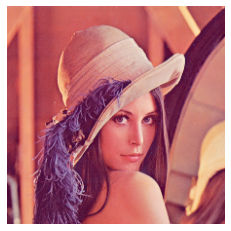

In [10]:
#数据增强
import IPython.display as display

def preprocess(x,y=None):
    x=tf.io.read_file(x)
    x=tf.image.decode_png(x,channels=3)
    x=tf.image.resize(x,[224,224])
    return x/256.0

x=preprocess("lena.png")

plt.imshow(x)
plt.axis("off")
plt.show()

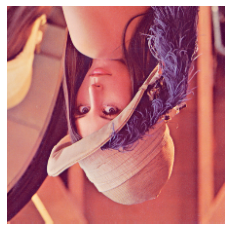

In [11]:
plt.imshow(tf.image.rot90(x,2))
plt.axis("off")
plt.show()

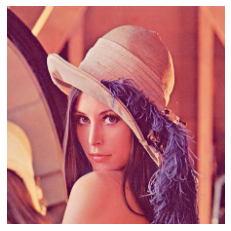

In [12]:
plt.imshow(tf.image.random_flip_left_right(x))
plt.axis("off")
plt.show()

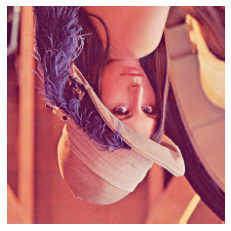

In [13]:
plt.imshow(tf.image.random_flip_up_down(x))
plt.axis("off")
plt.show()

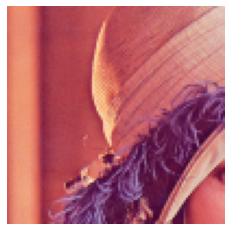

In [14]:
plt.imshow(tf.image.random_crop(x,[100,100,3]))
plt.axis("off")
plt.show()

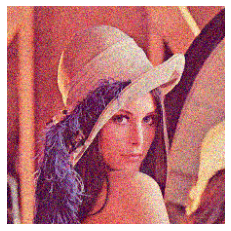

In [15]:
plt.imshow(tf.clip_by_value(x+tf.random.normal(shape=x.shape)*0.1,clip_value_min=0.0,clip_value_max=1.0))
plt.axis("off")
plt.show()